In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
episodes_df = pd.read_csv('episodes_df.csv')

In [4]:
episodes_df

,season,episodeNumber,episodeName,dateAired,description,guestStar,rating,note,overview
0,0,1,A Man Became A Dad,2013-09-19,The four celebrity dads are introduced along w...,NaN,8.1,NaN,The four celebrity dads are introduced along w...
1,0,2,The Dad's Are In Crisis,2013-09-20,Lee Hwijae takes his twin boys out to a friend...,NaN,8.6,NaN,Lee Hwijae takes his twin boys out to a friend...
2,0,3,In The Name of Father...,2013-09-21,Lee Hwijae's father pays a visit to his home t...,NaN,8.5,NaN,Lee Hwijae's father pays a visit to his home t...
3,1,1,Things You Only Realize Once You Raise Them,2013-11-03,Choo Sunghoon and Sarang are going to Osaka to...,"['Jung Eunpyo', 'Mithra Jin & DJ Tukutz (Epik ...",7.2,NaN,The four celebrity dads are introduced along w...
4,1,2,They’re Just Like Me,2013-11-10,"Sunghoon and Sarang have so much fun in Osaka,...","['Park Seojoon', 'Yoon Bora', 'Lee Dongwook']",7.9,NaN,"Sunghoon and Sarang have so much fun in Osaka,..."
...,...,...,...,...,...,...,...,...,...
302,1,300,I Love You 300,2019-10-20,Hee Joon and Jam Jam go to a glamping site to ...,['Lee Youngja'],13.9,NaN,Hee Joon and Jam Jam go to a glamping site to ...
303,1,301,If Only There Were Practice In Childcare,2019-10-27,Kyung Min surprises Ra Won with her own bedroo...,['Hwang Kwanghee '],14.5,NaN,Kyung Min surprises Ra Won with her own bedroo...
304,1,302,They Grow as Much as You Trust in Them,2019-11-03,Ra Won goes grocery shopping by herself and re...,"['', 'Seungkwan (Seventeen)', 'DK (Seventeen)'...",14.0,NaN,Ra Won goes grocery shopping by herself and re...
305,1,303,The World is Beautiful When You Smile,2019-11-10,The Return of Superman reaches its sixth anniv...,"['Sean (Jinusean)', 'Yeon Junghoon', 'Ha Seung...",12.7,NaN,The Return of Superman reaches its sixth anniv...


In [5]:
episodes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 9 columns):
season           307 non-null int64
episodeNumber    307 non-null int64
episodeName      307 non-null object
dateAired        307 non-null object
description      281 non-null object
guestStar        164 non-null object
rating           307 non-null float64
note             1 non-null object
overview         100 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 21.7+ KB


In [6]:
episodes_df.isna().sum()

season             0
episodeNumber      0
episodeName        0
dateAired          0
description       26
guestStar        143
rating             0
note             306
overview         207
dtype: int64

In [11]:
episodes_df = episodes_df.drop(episodes_df[episodes_df['season'] == 0].index)

In [12]:
episodes_df.drop

<bound method DataFrame.drop of      season  episodeNumber                                  episodeName  \
3         1              1  Things You Only Realize Once You Raise Them   
4         1              2                         They’re Just Like Me   
5         1              3                     I Can't Live Without You   
6         1              4                This is What Your Dad is Like   
7         1              5                   It’s Okay to Fail at First   
..      ...            ...                                          ...   
302       1            300                               I Love You 300   
303       1            301     If Only There Were Practice In Childcare   
304       1            302       They Grow as Much as You Trust in Them   
305       1            303        The World is Beautiful When You Smile   
306       1            304                                          TBA   

      dateAired                                        description 

In [13]:
episodes_df.describe()

,season,episodeNumber,rating
count,304.0,304.00000,304.000000
mean,1.0,152.50000,11.821382
std,0.0,87.90146,2.978898
min,1.0,1.00000,5.600000
25%,1.0,76.75000,9.600000
50%,1.0,152.50000,11.000000
75%,1.0,228.25000,14.125000
max,1.0,304.00000,20.700000


Text(0.5, 0, 'ratings of episodes')

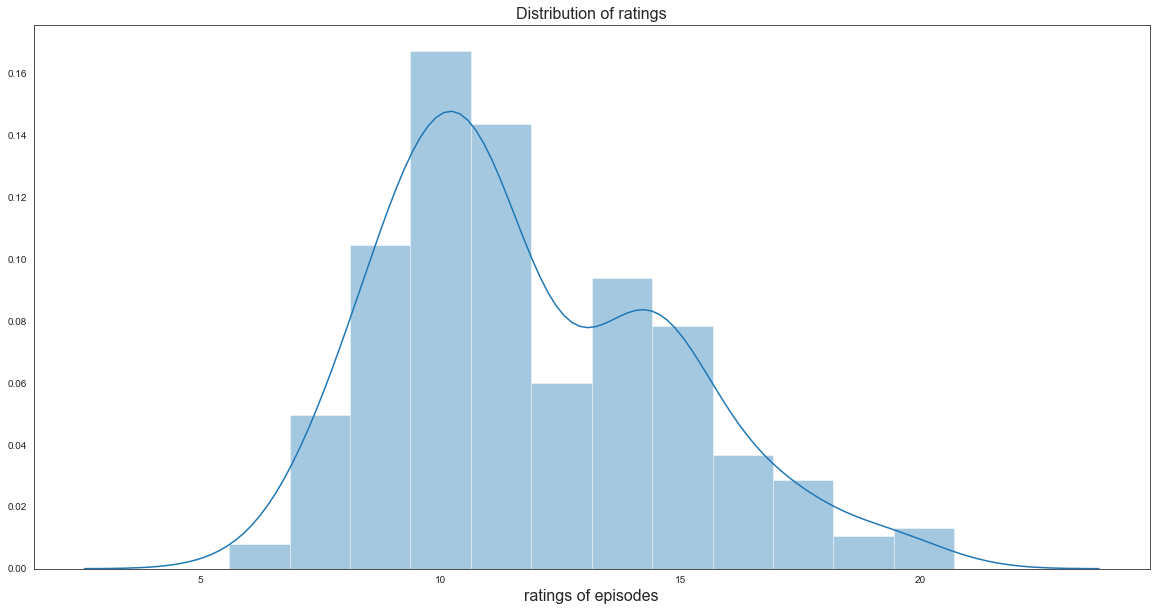

In [14]:
sns.set_style('white')

plt.figure(figsize=(20, 10))
sns.distplot(episodes_df['rating'])
plt.title('Distribution of ratings', fontsize=16)
plt.xlabel('ratings of episodes', fontsize=16)

Distribution is bi-modal

- The control group is comprised of episodes without guest stars.
- The experimental group is comprised of episodes with guest stars.

$H_o:$ There is no difference in the mean ratings of episodes when comparing episodes where there are guests and episodes where there are no guests.

$H_a:$ There is a difference in the mean ratings of episode with guests and the mean ratings of episodes without guest stars.

In [15]:
# create control and experimental groups
control = episodes_df[episodes_df['guestStar'].isnull()]
control = control['rating']
exp = episodes_df[episodes_df['guestStar'].isnull() == False]
exp = exp['rating']

In [16]:
control

5       8.4
6       6.8
15      9.8
16      9.9
19     10.4
       ... 
295    15.4
297    14.5
299    14.5
301    14.3
306    12.7
Name: rating, Length: 140, dtype: float64

In [17]:
exp

3       7.2
4       7.9
7       7.4
8       7.5
9       8.8
       ... 
300    14.1
302    13.9
303    14.5
304    14.0
305    12.7
Name: rating, Length: 164, dtype: float64

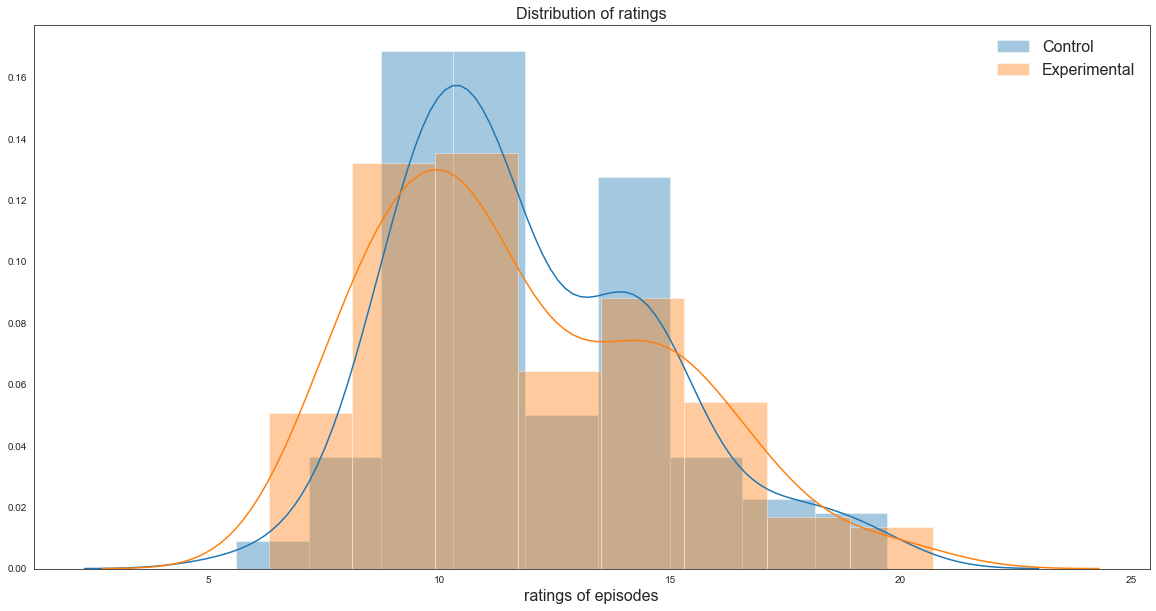

In [18]:
plt.figure(figsize=(20, 10))
sns.distplot(control, label='Control')
sns.distplot(exp, label='Experimental')
plt.title('Distribution of ratings', fontsize=16)
plt.xlabel('ratings of episodes', fontsize=16)
plt.legend(frameon=False, fontsize=16, loc='best')

In [19]:
import scipy.stats as stat

print('Normality of distribution: ', stat.normaltest(control))
print('Normality of distribution: ', stat.normaltest(exp))

Normality of distribution:  NormaltestResult(statistic=10.048214017109252, pvalue=0.006577457486434571)
Normality of distribution:  NormaltestResult(statistic=10.358585646862375, pvalue=0.0056319878162805915)


Given the extremely low p-value, we have strong evidence against the distributions being normal.

In [20]:
# create function to sample with replacement
def get_sample(df, n):
    sample = []
    while len(sample) != n:
        x = np.random.choice(df)
        sample.append(x)
    return sample

# create function to calculate mean of the sample
def get_sample_mean(sample):
    return sum(sample)/len(sample)

# combine functions to create a sample distribution
# create a distribution size of 1000 and sample size of 500
def create_sample_distribution(df, dist_size=1000, n=130):
    sample_dist = [] 
    while len(sample_dist) != dist_size:
        sample = get_sample(df, n)
        sample_mean = get_sample_mean(sample)
        sample_dist.append(sample_mean)
        
    return sample_dist

In [21]:
# create sample distributions of sample mean for control and experimental
ctrl_sample = create_sample_distribution(control)
exp_sample = create_sample_distribution(exp)

In [22]:
from statistics import mean 
mean(ctrl_sample)

11.907270769230768

In [23]:
mean(exp_sample)

11.748916153846155


Reference: https://github.com/stevhliu/dsc-2-final-project-online-ds-sp-000/blob/master/student.ipynb

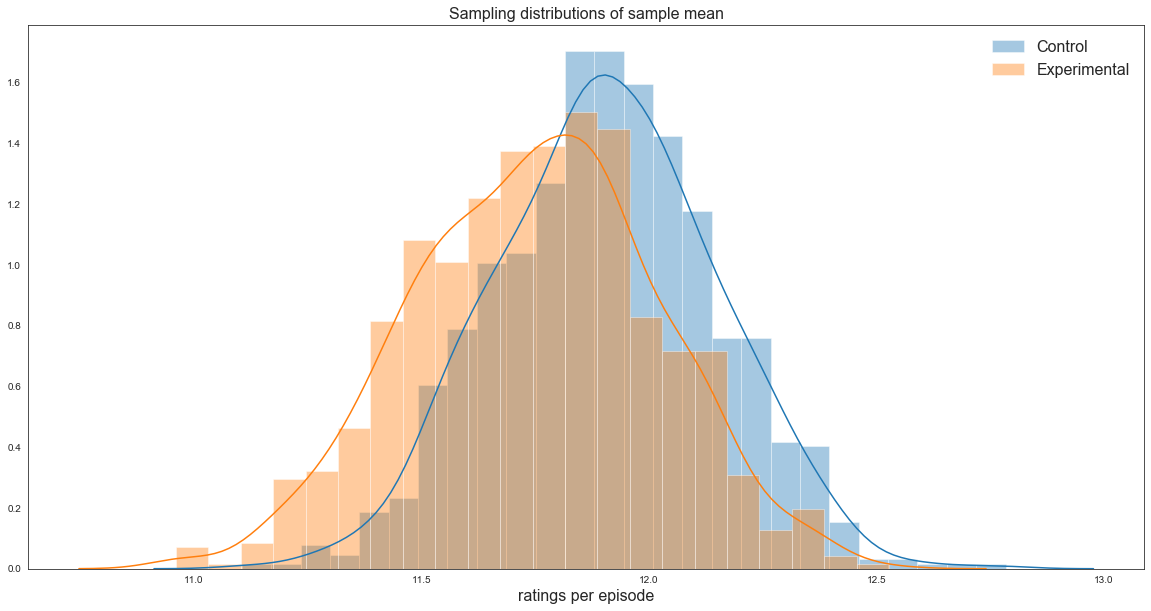

In [24]:
plt.figure(figsize = (20, 10))
sns.distplot(ctrl_sample, label='Control')
sns.distplot(exp_sample, label='Experimental')
plt.title('Sampling distributions of sample mean', fontsize=16)
plt.xlabel('ratings per episode', fontsize=16)
plt.legend(frameon=False, fontsize=16, loc='best')

In [25]:
np.var(control) == np.var(exp)

False

In [26]:
statistic, pvalue = stat.ttest_ind(exp_sample, ctrl_sample, equal_var=False)
print("statistic: ", statistic)
print("p value: ", pvalue)

statistic:  -13.887971182248505
p value:  6.495971152843634e-42


In [27]:
pvalue/2

3.247985576421817e-42

In [28]:
def Cohen_d(group1, group2):

    diff = group1.mean()-group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    pooled_var = (n1*var1+n2*var2) / (n1+n2)
  
    d = diff / np.sqrt(pooled_var)
    
    return d

# calculate Cohen's d for target and control samples
print("Cohen's d:" , Cohen_d(np.array(ctrl_sample), np.array(exp_sample)))
#values of 0 - 0.2 have little or no effect and values of >= 0.8 have a large effect size

Cohen's d: 0.6213997302402637



Our Cohen's d value is of > 0.2 but less than 0.8 so we interpret our results as having a medium effect size, which supports the conclusion from the hypothesis test.

The probability of getting a test statistic of -9.73, if in fact the null hypothesis is true, is 3.4e-22. In other words, we reject the null hypothesis and we find strong evidence that the mean ratings of episodes without guests is significantly different with the mean ratings of episodes with guests. However, while our result is statistically significant, we interpret Cohen's d-value as only having a medium effect size (0.2 - 0.5). 